<a href="https://colab.research.google.com/github/aymanmarr/TestCodeEnsa/blob/main/LoiWeibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          ANALYSE DE WEIBULL - RÉSULTATS

📊 PARAMÈTRES ESTIMÉS:
  β (Paramètre de forme)  : 2.2234
  η (Paramètre d'échelle) : 1414.67 heures
  MTTF                    : 1252.93 heures

📈 QUALITÉ DE L'AJUSTEMENT:
  R² : 0.9276

🔍 INTERPRÉTATION:
  β = 2.223 > 1 : Défaillances d'usure


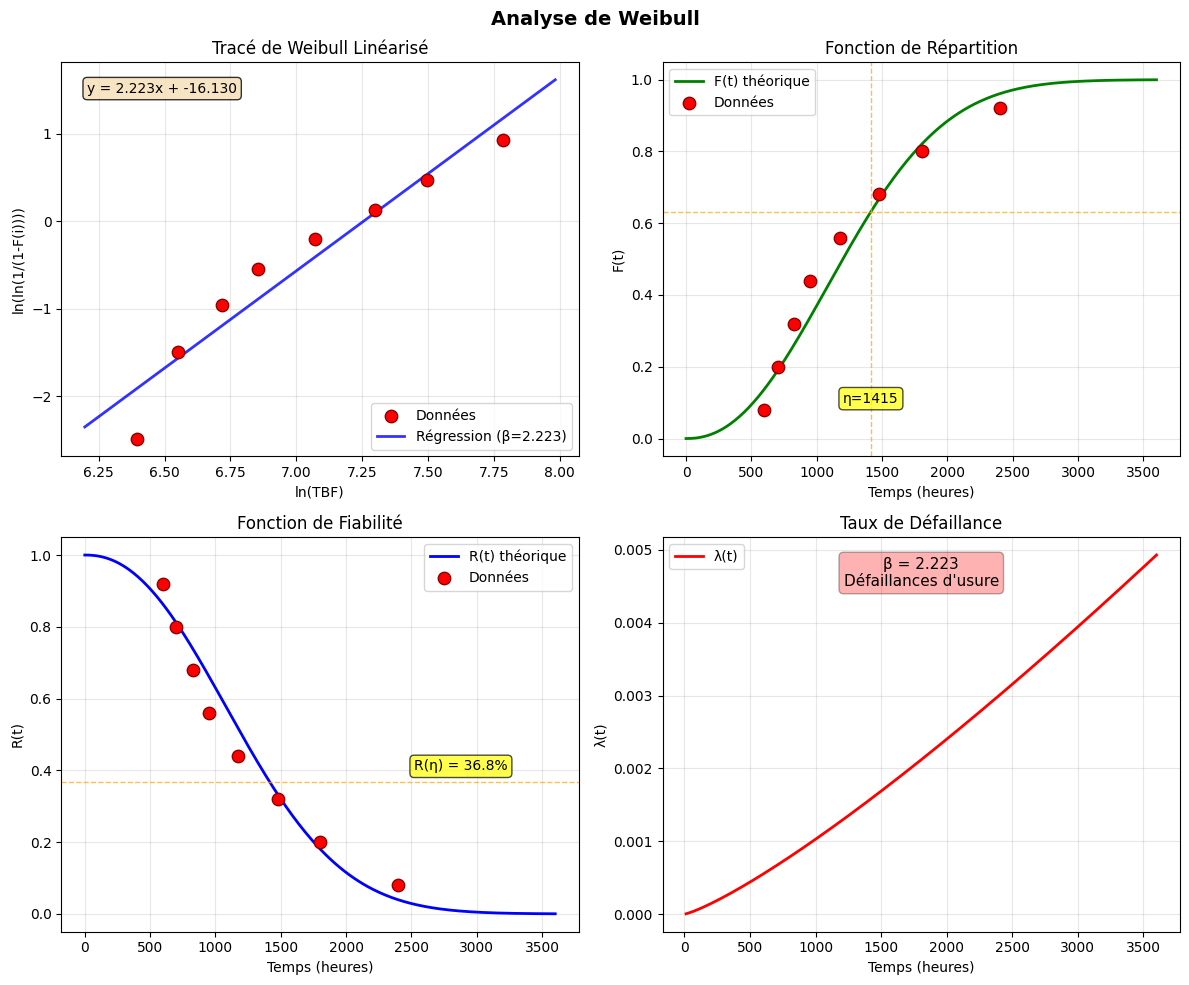


📋 TABLEAU DES DONNÉES ET CALCULS:
------------------------------------------------------------
     TBF |     F(i) |    ln(TBF) |            Y |  F(t) theo
------------------------------------------------------------
     600 |    0.080 |     6.3969 |      -2.4843 |      0.138
     700 |    0.200 |     6.5511 |      -1.4999 |      0.189
     827 |    0.320 |     6.7178 |      -0.9528 |      0.261
     950 |    0.440 |     6.8565 |      -0.5450 |      0.338
    1176 |    0.560 |     7.0699 |      -0.1973 |      0.485
    1480 |    0.680 |     7.2998 |       0.1305 |      0.669
    1803 |    0.800 |     7.4972 |       0.4759 |      0.820
    2400 |    0.920 |     7.7832 |       0.9265 |      0.961
------------------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.special import gamma

# ========================================
# VERSION SIMPLIFIÉE - ANALYSE DE WEIBULL
# ========================================

# --- 1. DONNÉES DU TABLEAU ---
TBF = np.array([600, 700, 827, 950, 1176, 1480, 1803, 2400])
F_i = np.array([0.08, 0.20, 0.32, 0.44, 0.56, 0.68, 0.80, 0.92])

# --- 2. TRANSFORMATION LINÉAIRE DE WEIBULL ---
X = np.log(TBF)
Y = np.log(np.log(1 / (1 - F_i)))

# --- 3. RÉGRESSION LINÉAIRE ---
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Paramètres de Weibull
beta = slope               # Paramètre de forme
eta = np.exp(-intercept / beta)  # Paramètre d'échelle

# MTTF (Mean Time To Failure)
mttf = eta * gamma(1 + 1/beta)

# --- 4. AFFICHAGE DES RÉSULTATS ---
print("=" * 60)
print("          ANALYSE DE WEIBULL - RÉSULTATS")
print("=" * 60)
print(f"\n📊 PARAMÈTRES ESTIMÉS:")
print(f"  β (Paramètre de forme)  : {beta:.4f}")
print(f"  η (Paramètre d'échelle) : {eta:.2f} heures")
print(f"  MTTF                    : {mttf:.2f} heures")
print(f"\n📈 QUALITÉ DE L'AJUSTEMENT:")
print(f"  R² : {r_value**2:.4f}")

# Interprétation
print(f"\n🔍 INTERPRÉTATION:")
if beta < 1:
    print(f"  β = {beta:.3f} < 1 : Défaillances précoces (période de rodage)")
elif 0.95 <= beta <= 1.05:
    print(f"  β ≈ 1 : Défaillances aléatoires")
else:
    print(f"  β = {beta:.3f} > 1 : Défaillances d'usure")
    if beta > 3.5:
        print("  → Distribution proche de la normale")

print("=" * 60)

# --- 5. GRAPHIQUES ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Analyse de Weibull', fontsize=14, fontweight='bold')

# Graphique 1: Weibull linéarisé
ax1 = axes[0, 0]
ax1.scatter(X, Y, c='red', s=80, marker='o', label='Données', zorder=5, edgecolors='darkred')
X_reg = np.linspace(X.min() - 0.2, X.max() + 0.2, 100)
Y_reg = slope * X_reg + intercept
ax1.plot(X_reg, Y_reg, 'b-', linewidth=2, label=f'Régression (β={beta:.3f})', alpha=0.8)
ax1.set_xlabel('ln(TBF)')
ax1.set_ylabel('ln(ln(1/(1-F(i))))')
ax1.set_title('Tracé de Weibull Linéarisé')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Équation sur le graphique
equation = f'y = {beta:.3f}x + {intercept:.3f}'
ax1.text(0.05, 0.95, equation, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Graphique 2: Fonction de répartition F(t)
ax2 = axes[0, 1]
t_range = np.linspace(0, max(TBF) * 1.5, 300)
F_t_theo = 1 - np.exp(-(t_range/eta)**beta)

ax2.plot(t_range, F_t_theo, 'g-', linewidth=2, label='F(t) théorique')
ax2.scatter(TBF, F_i, c='red', s=80, marker='o', label='Données', zorder=5, edgecolors='darkred')
ax2.axhline(y=0.632, color='orange', linestyle='--', linewidth=1, alpha=0.7)
ax2.axvline(x=eta, color='orange', linestyle='--', linewidth=1, alpha=0.7)
ax2.text(eta, 0.1, f'η={eta:.0f}', ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
ax2.set_xlabel('Temps (heures)')
ax2.set_ylabel('F(t)')
ax2.set_title('Fonction de Répartition')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Graphique 3: Fonction de fiabilité R(t)
ax3 = axes[1, 0]
R_t_theo = np.exp(-(t_range/eta)**beta)

ax3.plot(t_range, R_t_theo, 'b-', linewidth=2, label='R(t) théorique')
ax3.scatter(TBF, 1 - F_i, c='red', s=80, marker='o', label='Données', zorder=5, edgecolors='darkred')
ax3.axhline(y=0.368, color='orange', linestyle='--', linewidth=1, alpha=0.7)
ax3.text(max(t_range)*0.7, 0.4, 'R(η) = 36.8%', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
ax3.set_xlabel('Temps (heures)')
ax3.set_ylabel('R(t)')
ax3.set_title('Fonction de Fiabilité')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Graphique 4: Taux de défaillance λ(t)
ax4 = axes[1, 1]
t_lambda = t_range[1:]  # Éviter t=0
lambda_t = (beta/eta) * (t_lambda/eta)**(beta-1)

ax4.plot(t_lambda, lambda_t, 'r-', linewidth=2, label='λ(t)')

# Type de défaillance
if beta < 1:
    failure_type = "Défaillances précoces"
    color = 'orange'
elif 0.95 <= beta <= 1.05:
    failure_type = "Défaillances aléatoires"
    color = 'green'
else:
    failure_type = "Défaillances d'usure"
    color = 'red'

ax4.text(0.5, 0.95, f'β = {beta:.3f}\n{failure_type}',
         transform=ax4.transAxes, fontsize=11,
         ha='center', va='top',
         bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))

ax4.set_xlabel('Temps (heures)')
ax4.set_ylabel('λ(t)')
ax4.set_title('Taux de Défaillance')
ax4.grid(True, alpha=0.3)
ax4.legend()

plt.tight_layout()
plt.show()

# --- 6. TABLEAU RÉCAPITULATIF ---
print("\n📋 TABLEAU DES DONNÉES ET CALCULS:")
print("-" * 60)
print(f"{'TBF':>8} | {'F(i)':>8} | {'ln(TBF)':>10} | {'Y':>12} | {'F(t) theo':>10}")
print("-" * 60)
for i in range(len(TBF)):
    F_theo = 1 - np.exp(-(TBF[i]/eta)**beta)
    print(f"{TBF[i]:8.0f} | {F_i[i]:8.3f} | {X[i]:10.4f} | {Y[i]:12.4f} | {F_theo:10.3f}")
print("-" * 60)